In [1]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import rc
import statsmodels.api as sm


In [2]:
zip_data = "Project1_State_Data.csv"
zip_data_df = pd.read_csv(zip_data, dtype=str, low_memory=False)

In [45]:
zip_data_df.columns

Index(['State', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Count', 'Poverty Rate',
       'Total No HS Diploma', 'No High School Diploma Rate',
       'Total HS Diploma', 'HS Diploma Rate', 'Total Some College',
       'Some College Rate', 'Total College Degrees', 'College Degree Rate',
       'Total educational attainment over 25', 'Never Married',
       'Never Married Rate', 'Married', 'Married Rate', 'Widowed',
       'Widowed Rate', 'Divorced', 'Divorced Rate', 'Over 15 Marital Status'],
      dtype='object')

In [3]:
zip_data_df["Total No HS Diploma"] = zip_data_df["Total No HS Diploma"].astype(float)
zip_data_df["Total HS Diploma"] = zip_data_df["Total HS Diploma"].astype(float)
zip_data_df["Total College Degrees"] = zip_data_df["Total College Degrees"].astype(float)
zip_data_df = zip_data_df.dropna()

In [5]:
# create a new df containing all numeric columns
state_data_numeric = zip_data_df[["Total No HS Diploma", "Total HS Diploma", "Total College Degrees"]]

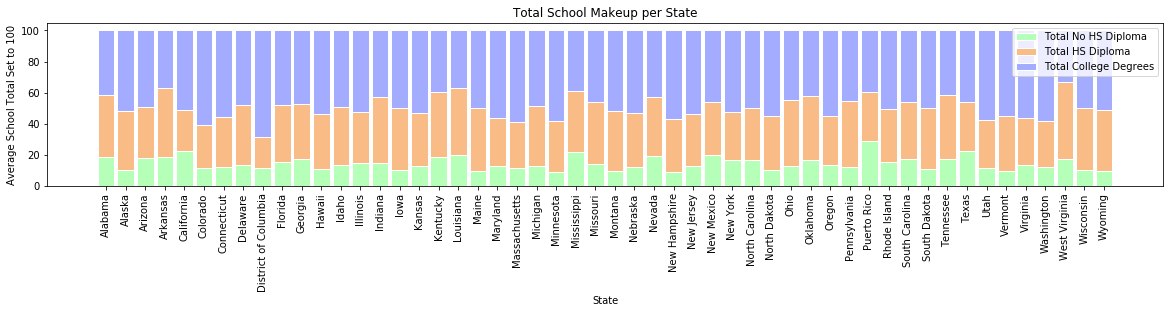

In [6]:
# Data
r = zip_data_df['State']
raw_data = {'greenBars': state_data_numeric['Total No HS Diploma'], 'orangeBars': state_data_numeric['Total HS Diploma'],\
            'blueBars': state_data_numeric['Total College Degrees']}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
plt.figure(figsize=(20,3))
barWidth = 0.85
names = zip_data_df['State']
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label= "Total No HS Diploma")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label= 'Total HS Diploma')
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label= 'Total College Degrees')
 
# Custom x axis
plt.title("Total School Makeup per State")
plt.xlabel("State")
plt.ylabel("Average School Total Set to 100")
plt.xticks(r, names, rotation="vertical")

# Create a legend for the chart
plt.legend(loc="best")

# Show graphic
#plt.show()

plt.savefig("./Presentation_Visuals/TotalStateSchooling.png")

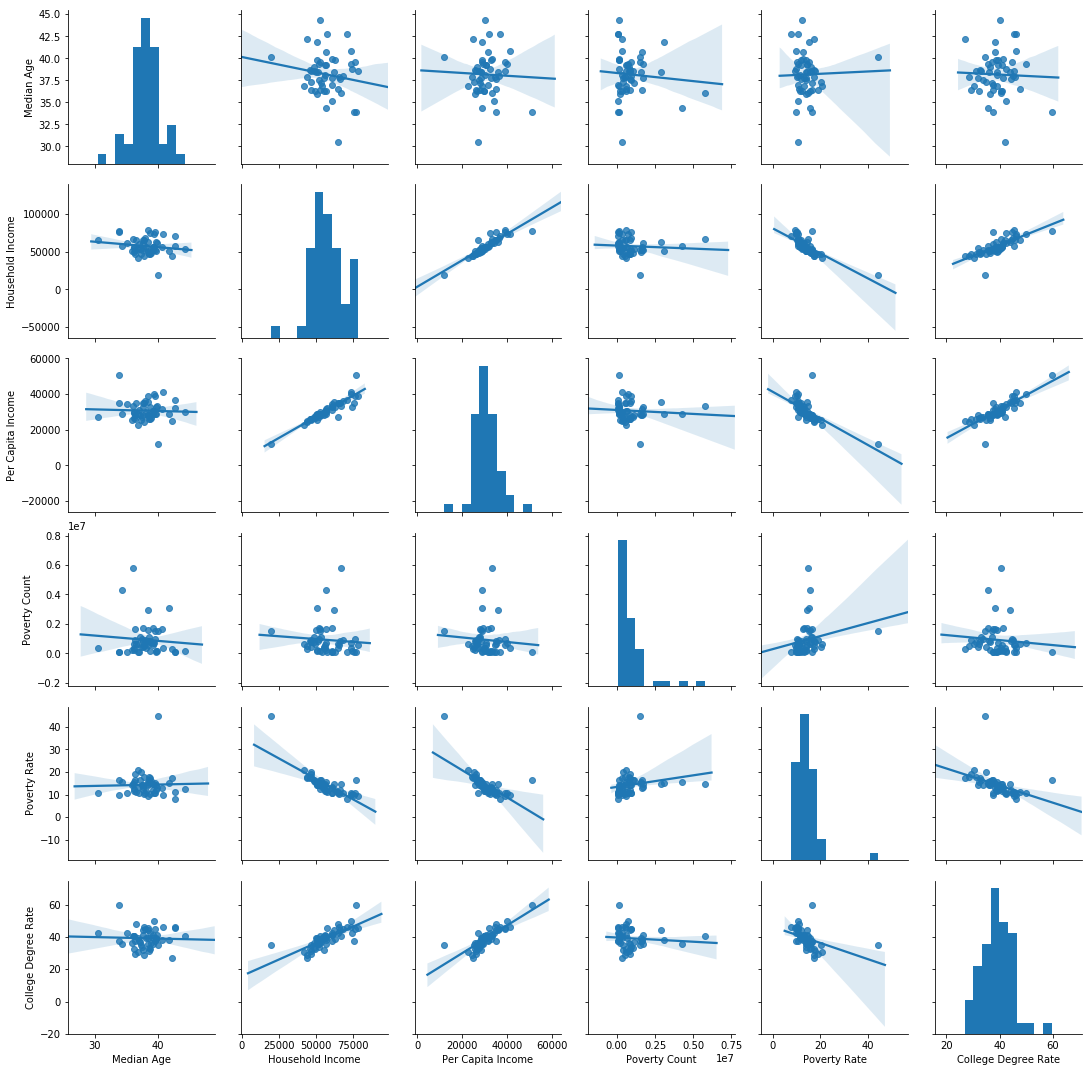

In [34]:
# household income vs total no hs diploma scatter plot

# convert columns to float for processing
zip_data_df["Median Age"] = zip_data_df["Median Age"].astype(float)
zip_data_df["Household Income"] = zip_data_df["Household Income"].astype(float)
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["Poverty Count"] = zip_data_df["Poverty Count"].astype(float)
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["College Degree Rate"] = zip_data_df["College Degree Rate"].astype(float)
zip_data_df = zip_data_df.dropna()

# create a new df containing all numeric columns
census_data_numeric = zip_data_df[["Median Age", "Household Income", "Per Capita Income", \
                                            "Poverty Count", "Poverty Rate", "College Degree Rate"]]

# seaborn pair plot
sns.pairplot(census_data_numeric, kind="reg")

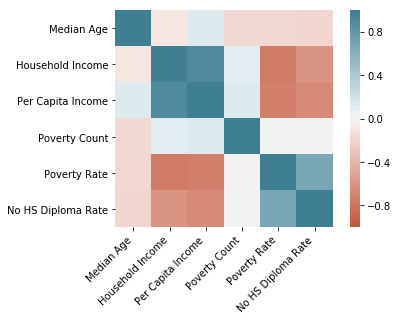

In [7]:
# heat map on correlation matrix
corr = census_data_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

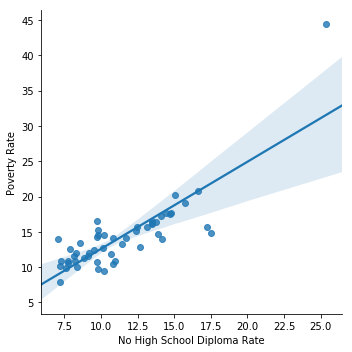

In [11]:
sns.lmplot(y='Poverty Rate', x='No High School Diploma Rate', data=census_data_numeric)


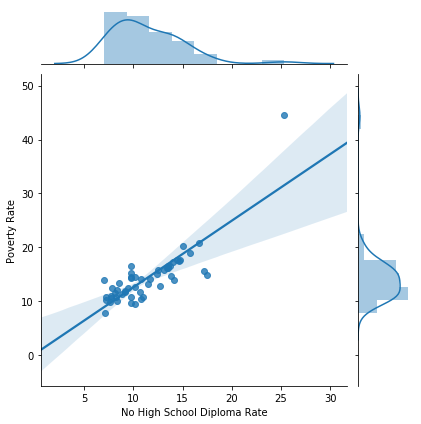

In [16]:
sns.jointplot(y='Poverty Rate', x='No High School Diploma Rate', data=census_data_numeric, kind="reg");

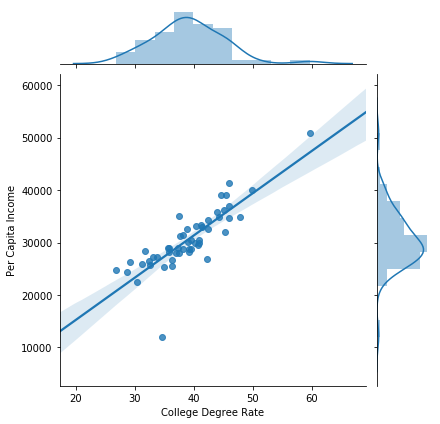

In [35]:
sns.jointplot(y='Per Capita Income', x='College Degree Rate', data=census_data_numeric, kind="reg");

In [4]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No High School Diploma Rate"] = zip_data_df["No High School Diploma Rate"].astype(float)
    

In [5]:
# create a new df containing all numeric columns
county_data_numeric = zip_data_df[["Poverty Rate", "No High School Diploma Rate"]]

In [14]:
print(county_data_numeric.describe())

       Poverty Rate  No High School Diploma Rate
count     52.000000                    52.000000
mean      14.292235                    11.376476
std        5.168543                     3.479304
min        7.843988                     7.024104
25%       11.172224                     8.786896
50%       14.017835                    10.451235
75%       15.833668                    13.559146
max       44.486494                    25.331365


In [4]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No High School Diploma Rate"] = zip_data_df["No High School Diploma Rate"].astype(float)

In [5]:
# create a new df containing all numeric columns
nohsstate_data_numeric = zip_data_df[["Poverty Rate", "No High School Diploma Rate"]]

Text(0.95, 0.9, 'R_Value:0.8307891048604056')

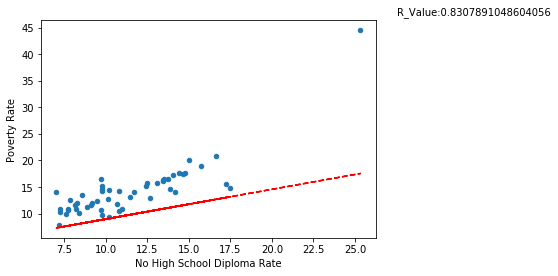

In [30]:
# use linear regression to fit poverty rate and no hs diploma rate 
(slope, intercept, r_value, _, _) = linregress(nohsstate_data_numeric["Poverty Rate"], nohsstate_data_numeric["No High School Diploma Rate"])
fit = slope * nohsstate_data_numeric["No High School Diploma Rate"] + intercept

nohsstate_data_numeric.plot.scatter(x="No High School Diploma Rate", y="Poverty Rate")
plt.plot(nohsstate_data_numeric["No High School Diploma Rate"], fit, 'r--')
plt.figtext(.95, .9, f"R_Value:{ r_value }")

#plt.savefig("./Presentation_Visuals/NoHSstatePovertyratervalue.png")

In [42]:
nohsstate_data_numeric['No High School Diploma Rate'].corr(nohsstate_data_numeric['Poverty Rate'])

0.8307891048604056

In [6]:
stats.pearsonr(nohsstate_data_numeric['Poverty Rate'], nohsstate_data_numeric['No High School Diploma Rate'])

(0.7805132196463324, 1.4447783399476234e-11)

In [31]:
nohsstate_data_numeric['No High School Diploma Rate'].max()

17.508234229842003

In [32]:
nohsstate_data_numeric['No High School Diploma Rate'].min()

7.02410362555919

In [33]:
nohsstate_data_numeric['No High School Diploma Rate'].mean()

11.10285074529508

In [34]:
nohsstate_data_numeric['Poverty Rate'].max()

20.762268017761585

In [35]:
nohsstate_data_numeric['Poverty Rate'].min()

7.843988202857984

In [36]:
nohsstate_data_numeric['Poverty Rate'].mean()

13.700190473520893

In [18]:
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["College Degree Rate"] = zip_data_df["College Degree Rate"].astype(float)

In [19]:
collegestate_data_numeric = zip_data_df[collegestate_data_numeric["Per Capita Income", "College Degree Rate"]]

In [21]:
collegestate_data_numeric["Per Capita Income"].max()

50832.0

In [22]:
collegestate_data_numeric["Per Capita Income"].min()

22500.0

In [23]:
collegestate_data_numeric["Per Capita Income"].mean()

31005.745098039217

In [25]:
collegestate_data_numeric["College Degree Rate"].max()

59.64804339500631

In [27]:
collegestate_data_numeric["College Degree Rate"].min()

26.835618185542625

In [28]:
collegestate_data_numeric["College Degree Rate"].mean()

39.2195249529238

In [20]:
stats.pearsonr(collegestate_data_numeric["Per Capita Income"], collegestate_data_numeric["College Degree Rate"])

(0.8877512060910367, 3.9279996490911994e-18)

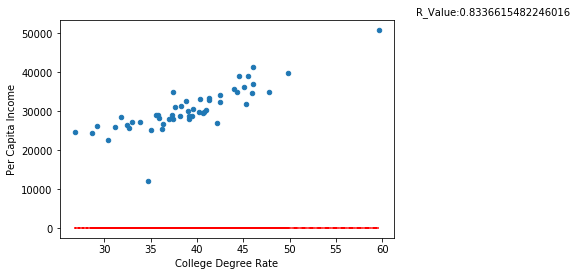

In [55]:
# use linear regression to fit poverty rate and college degree  
(slope, intercept, r_value, _, _) = linregress(collegestate_data_numeric["Per Capita Income"], collegestate_data_numeric["College Degree Rate"])
fit = slope * collegestate_data_numeric["College Degree Rate"] + intercept

collegestate_data_numeric.plot.scatter(x="College Degree Rate", y="Per Capita Income")
plt.plot(collegestate_data_numeric["College Degree Rate"], fit, 'r--')
plt.figtext(.95, .9, f"R_Value:{ r_value }")

plt.savefig("./Data/collegestatepercapitarate.png")

In [39]:
collegestate_data_numeric['College Degree Rate'].corr(collegestate_data_numeric['Per Capita Income'])

0.8336615482246015

Text(0.95, 0.5, 'R_Value:0.09994916159951697')

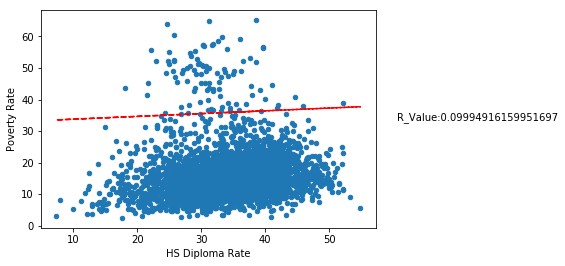

In [52]:
# use linear regression to fit poverty rate and no hs diploma rate 
(slope, intercept, r_value, _, _) = linregress(county_data_numeric["Poverty Rate"], county_data_numeric["HS Diploma Rate"])
fit = slope * county_data_numeric["HS Diploma Rate"] + intercept

county_data_numeric.plot.scatter(x="HS Diploma Rate", y="Poverty Rate")
plt.plot(county_data_numeric["HS Diploma Rate"], fit, 'r--')
plt.figtext(.95, .5, f"R_Value:{ r_value }")

#plt.savefig("./Data/HSPovertyratervalue.png")

In [64]:
from statsmodels.formula.api import ols

In [65]:
data = zip_data_df[["Poverty Rate", "No HS Diploma Rate"]]
x = data['No HS Diploma Rate']
y = data['Poverty Rate']

In [66]:
model = ols("x ~ y", data).fit()

In [67]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     2570.
Date:                Sat, 27 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:45:25   Log-Likelihood:                -9815.0
No. Observations:                3220   AIC:                         1.963e+04
Df Residuals:                    3218   BIC:                         1.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0344      0.201     25.019      0.0

In [7]:
# create a new df containing all numeric columns
county_data_numeric = zip_data_df[["Poverty Rate", "No HS Diploma Rate"]]

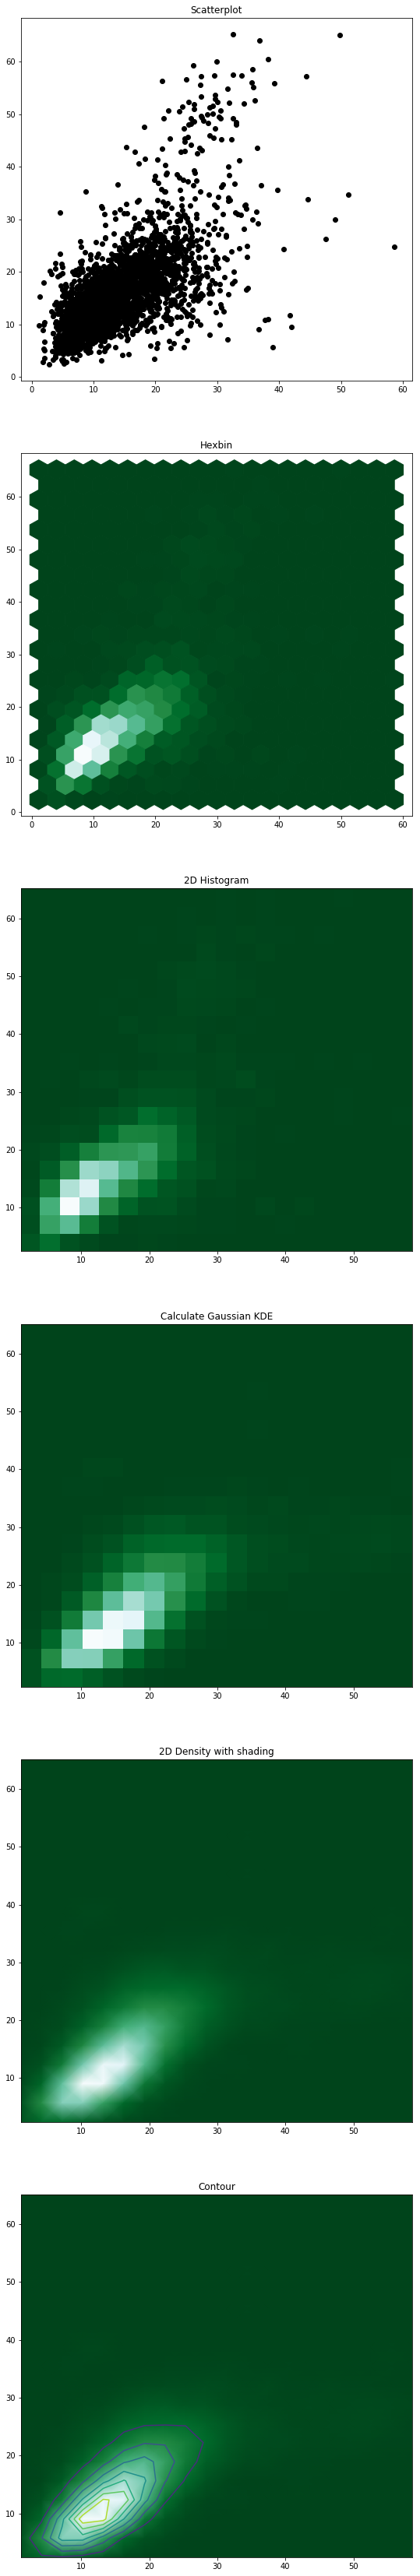

In [38]:
from scipy.stats import kde
 

# Create data: 1000 points
data= county_data_numeric['Poverty Rate'].sample(n=1000, random_state=1), county_data_numeric['No HS Diploma Rate'].sample(n=1000, random_state=1)

x = county_data_numeric['No HS Diploma Rate']
#.sample(n=1000, random_state=1)
y = county_data_numeric['Poverty Rate']
#.sample(n=1000, random_state=1)
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=1, nrows=6, figsize=(9, 60))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )



plt.savefig("./Data/NoHSPovertyratervalue2.png")

In [37]:
plt.savefig("./Data/NoHSPovertyratervalue2.png")

<Figure size 432x288 with 0 Axes>

In [47]:
zip_data_df["Never Married Rate"] = zip_data_df["Never Married Rate"].astype(float)
zip_data_df["Married Rate"] = zip_data_df["Married Rate"].astype(float)
zip_data_df["Divorced Rate"] = zip_data_df["Divorced Rate"].astype(float)
zip_data_df = zip_data_df.dropna()

In [48]:
# create a new df containing all numeric columns
state_data_numeric = zip_data_df[["Never Married Rate", "Married Rate", "Divorced Rate"]]

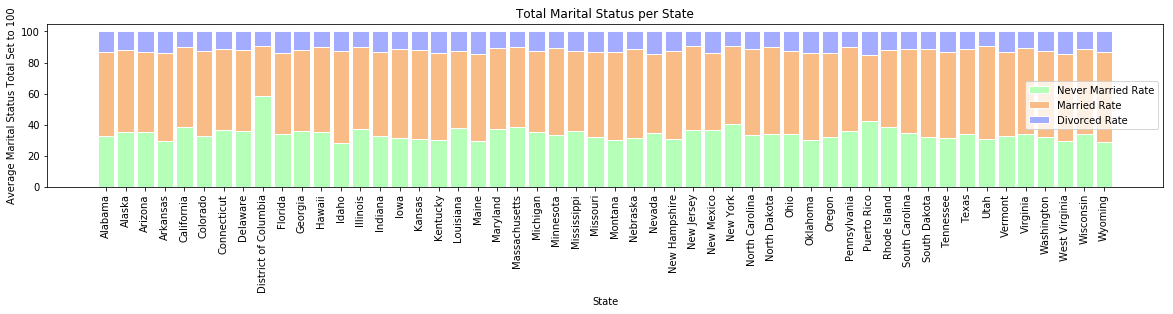

In [51]:
# Data
r = zip_data_df['State']
raw_data = {'greenBars': state_data_numeric['Never Married Rate'], 'yellowBars': state_data_numeric['Married Rate'],\
            'redBars': state_data_numeric['Divorced Rate']}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['yellowBars'], df['redBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
yellowBars = [i / j * 100 for i,j in zip(df['yellowBars'], totals)]
redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]
 
# plot
plt.figure(figsize=(20,3))
barWidth = 0.85
names = zip_data_df['State']
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label= "Never Married Rate")
# Create orange Bars
plt.bar(r, yellowBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label= 'Married Rate')
# Create blue Bars
plt.bar(r, redBars, bottom=[i+j for i,j in zip(greenBars, yellowBars)], color='#a3acff', edgecolor='white', width=barWidth, label= 'Divorced Rate')
 
# Custom x axis
plt.title("Total Marital Status per State")
plt.xlabel("State")
plt.ylabel("Average Marital Status Total Set to 100")
plt.xticks(r, names, rotation="vertical")

# Create a legend for the chart
plt.legend(loc="best")

# Show graphic
#plt.show()

plt.savefig("./Presentation_Visuals/MaritalStatusState.png")

In [52]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["Divorced Rate"] = zip_data_df["Divorced Rate"].astype(float)
zip_data_df = zip_data_df.dropna()

In [53]:
divorcestate_data_numeric = zip_data_df[["Poverty Rate", "Divorced Rate"]]

Text(0.95, 0.9, 'R_Value:0.4137660847685665')

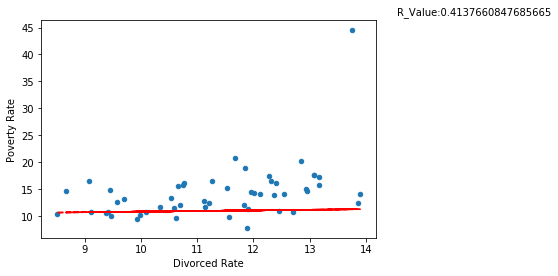

In [54]:
(slope, intercept, r_value, _, _) = linregress(divorcestate_data_numeric["Poverty Rate"], divorcestate_data_numeric["Divorced Rate"])
fit = slope * divorcestate_data_numeric["Divorced Rate"] + intercept

divorcestate_data_numeric.plot.scatter(x="Divorced Rate", y="Poverty Rate")
plt.plot(divorcestate_data_numeric["Divorced Rate"], fit, 'r--')
plt.figtext(.95, .9, f"R_Value:{ r_value }")

In [56]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["Married Rate"] = zip_data_df["Married Rate"].astype(float)
zip_data_df = zip_data_df.dropna()

In [57]:
marriedstate_data_numeric = zip_data_df[["Poverty Rate", "Married Rate"]]

Text(0.95, 0.9, 'R_Value:-0.5005184024048108')

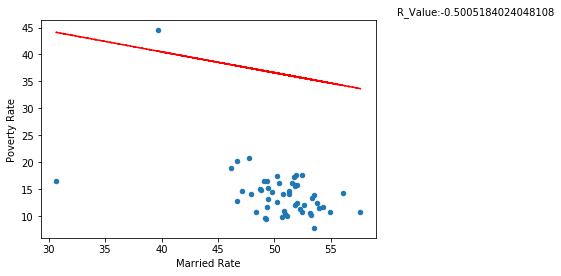

In [58]:
(slope, intercept, r_value, _, _) = linregress(marriedstate_data_numeric["Poverty Rate"], marriedstate_data_numeric["Married Rate"])
fit = slope * marriedstate_data_numeric["Married Rate"] + intercept

marriedstate_data_numeric.plot.scatter(x="Married Rate", y="Poverty Rate")
plt.plot(marriedstate_data_numeric["Married Rate"], fit, 'r--')
plt.figtext(.95, .9, f"R_Value:{ r_value }")

KeyError: 'Total No HS Diploma'